# Global Power Plant Database
Project Description
The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 14,000 power plants from 3 countries(USA, AUS, INDIA) and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.
Key attributes of the database
The database includes the following indicators:
•	`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
•	`country_long` (text): longer form of the country designation
•	`name` (text): name or title of the power plant, generally in Romanized form
•	`gppd_idnr` (text): 10 or 12 character identifier for the power plant
•	`capacity_mw` (number): electrical generating capacity in megawatts
•	`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
•	`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
•	`primary_fuel` (text): energy source used in primary electricity generation or export
•	`other_fuel1` (text): energy source used in electricity generation or export
•	`other_fuel2` (text): energy source used in electricity generation or export
•	`other_fuel3` (text): energy source used in electricity generation or export
•	 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
•	`owner` (text): majority shareholder of the power plant, generally in Romanized form
•	`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
•	`url` (text): web document corresponding to the `source` field
•	`geolocation_source` (text): attribution for geolocation information
•	`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
•	`year_of_capacity_data` (number): year the capacity information was reported
•	`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
•	`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
•	`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
•	`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
•	`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
•	`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
•	`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
•	`generation_data_source` (text): attribution for the reported generation information
•	`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
•	`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
•	`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
•	`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
•	`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
•	'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
•	`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
•	`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
•	`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
•	`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 
Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 
Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

Hint : Use pandas methods to combine all the datasets and then start working on this project.


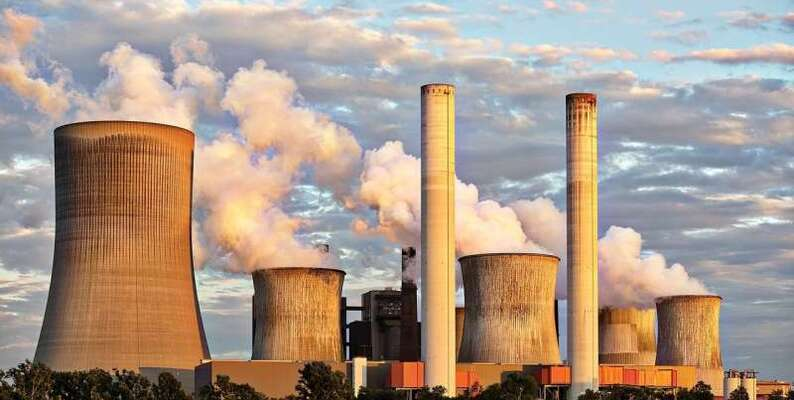

# Importing Required Libraries

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from scipy.stats import zscore

from sklearn.preprocessing import power_transform
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import joblib

In [15]:
df=pd.read_csv("PowerPlant.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [17]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.59665,865.4,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
907,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df.shape

(908, 25)

We have totally 908 rows and 25 columns

In [19]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In the given dataset there are mostly null values

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

There are 12 Object datatypes and 13 numerical datatypes in given dataset

# Here im going to remove some of the columns which are having maximum null values so that it cannot effect on my Predictions

In [28]:
df.drop(['estimated_generation_gwh','wepp_id','other_fuel3','other_fuel1','other_fuel2'],axis=1,inplace=True)

In [29]:
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
commissioning_year        380
owner                     566
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2013       524
generation_gwh_2014       507
generation_gwh_2015       483
generation_gwh_2016       471
generation_gwh_2017       465
generation_data_source    458
dtype: int64

In [30]:
df.drop(['gppd_idnr','owner','generation_data_source'],axis=1,inplace=True)

In [31]:
df.isnull().sum()

country                    0
country_long               0
name                       0
capacity_mw                0
latitude                  46
longitude                 46
primary_fuel               0
commissioning_year       380
source                     0
url                        0
geolocation_source        19
year_of_capacity_data    388
generation_gwh_2013      524
generation_gwh_2014      507
generation_gwh_2015      483
generation_gwh_2016      471
generation_gwh_2017      465
dtype: int64

Here I have removed unwanted columns

# Statistical Summary

In [32]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,862.000000,862.000000,528.000000,520.0,384.000000,401.000000,425.000000,437.000000,443.000000
mean,321.046378,21.196189,77.447848,1996.876894,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
std,580.221767,6.248627,4.907260,17.047817,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364
min,0.000000,8.168900,68.644700,1927.000000,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,16.771575,74.258975,1988.000000,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170
50%,60.000000,21.778300,76.719250,2000.000000,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700
75%,388.125000,25.516375,79.441475,2011.250000,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000
max,4760.000000,34.649000,95.408000,2018.000000,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


In [33]:
df['year_of_capacity_data'].nunique()

1

Here column 'year_of_capacity_data'is removed because it is having one unique value

In [34]:
df['name'].nunique()

908

dropping name column because there is no use of it

In [35]:
df.drop(['name','url'],axis=1,inplace=True)

In [36]:
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [37]:
# filling geolocation_source with mode because category data
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0], inplace=True)

In [38]:
# filling geolocation_source with mode because category data
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0], inplace=True)

In [39]:
# filling null values with median in numerical columns
df.fillna(df.median()[0], inplace=True)

In [40]:
df.isnull().sum()

country                  0
country_long             0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year       0
source                   0
geolocation_source       0
year_of_capacity_data    0
generation_gwh_2013      0
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
dtype: int64

here, we can see that null values has been removed

In [41]:
df['source'].nunique()

191

In [42]:
df['geolocation_source'].nunique()

3

In [43]:
df['country'].nunique()

1

In [44]:
df['country_long'].nunique()

1

also dropping columns 'country' and 'country_long' because having one country name only, it will not help for any prediction

In [45]:
df.drop(['country','country_long'],axis=1,inplace=True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   capacity_mw            908 non-null    float64
 1   latitude               908 non-null    float64
 2   longitude              908 non-null    float64
 3   primary_fuel           908 non-null    object 
 4   commissioning_year     908 non-null    float64
 5   source                 908 non-null    object 
 6   geolocation_source     908 non-null    object 
 7   year_of_capacity_data  908 non-null    float64
 8   generation_gwh_2013    908 non-null    float64
 9   generation_gwh_2014    908 non-null    float64
 10  generation_gwh_2015    908 non-null    float64
 11  generation_gwh_2016    908 non-null    float64
 12  generation_gwh_2017    908 non-null    float64
dtypes: float64(10), object(3)
memory usage: 92.3+ KB


<Axes: xlabel='primary_fuel', ylabel='count'>

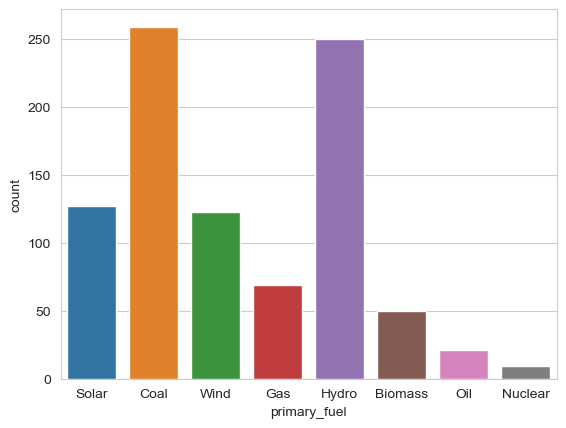

In [47]:
sns.set_style("whitegrid")
sns.countplot(x="primary_fuel", data=df)

# EDA

In [48]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,60.0,60.000000,60.000000,60.000,60.000000,60.000000
1,98.0,24.7663,74.6090,Coal,60.0,Ultratech Cement ltd,WRI,60.0,60.000000,60.000000,60.000,60.000000,60.000000
2,39.2,21.9038,69.3732,Wind,60.0,CDM,WRI,60.0,60.000000,60.000000,60.000,60.000000,60.000000
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,2018.0,631.777928,617.789264,843.747,886.004428,663.774500
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736


In [49]:
dfcorr=df.corr()

<Axes: >

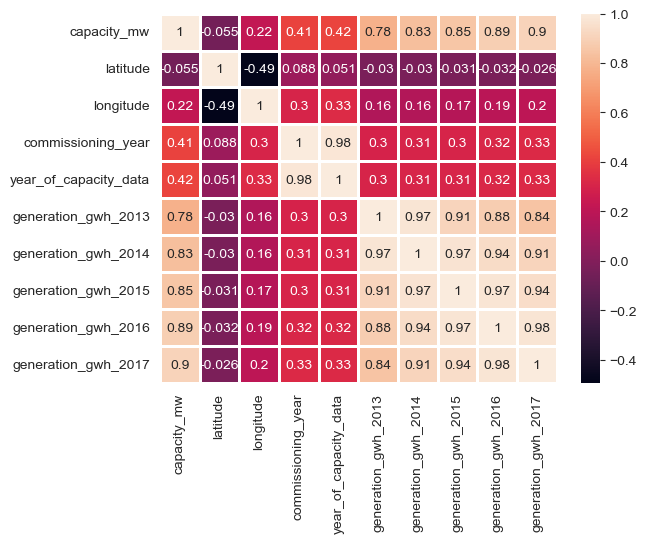

In [50]:
sns.heatmap(dfcorr,annot=True, linewidth=1)

Here we can notice generation_gwh_2013,...2014,....2015,...2016 ,...2017 are positively correlated to capacity_mw and latitude is negative correlated

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2013'>

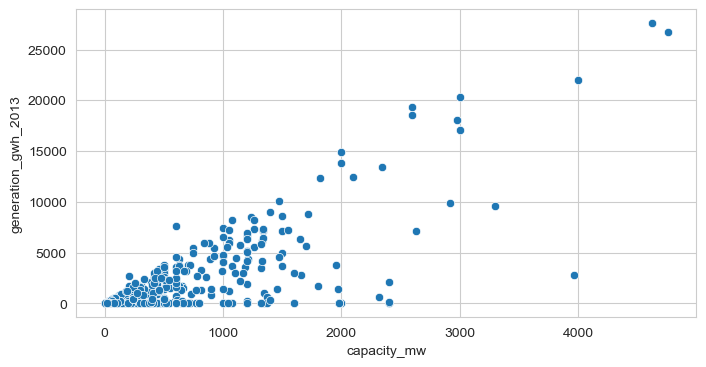

In [51]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2013',data=df)

we can notice here as electricity generation in gigawatt-hour increasing also increasing the no of electrical generating capacity in megawatts in 2013

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2014'>

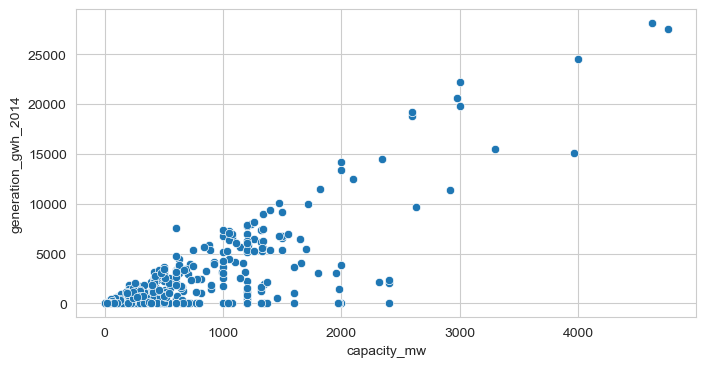

In [52]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2014',data=df)

In 2014 we can also notice here as electricity generation in gigawatt-hour increasing also increasing the no of electrical generating capacity in megawatts in 2014

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2015'>

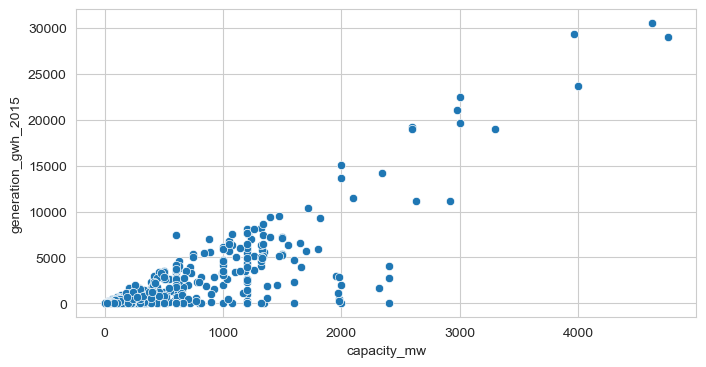

In [53]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2015',data=df)

In 2015 we can also notice here as electricity generation in gigawatt-hour increasing also increasing the no of electrical generating capacity in megawatts in 2015

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2016'>

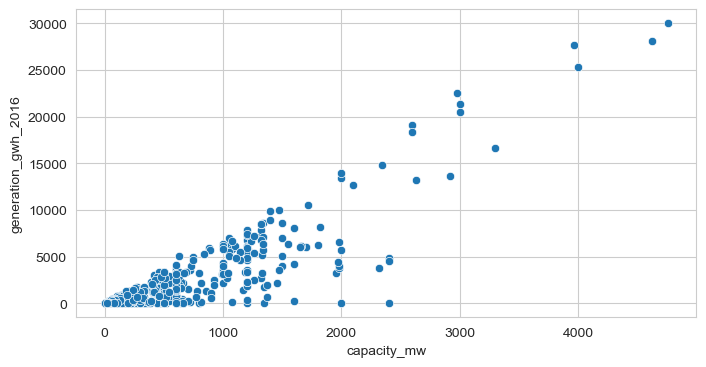

In [54]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2016',data=df)

In 2016 we can also notice here as electricity generation in gigawatt-hour increasing also increasing the no of electrical generating capacity in megawatts in 2016

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2017'>

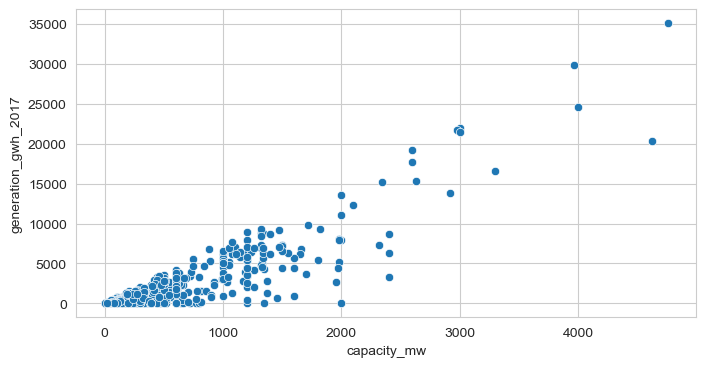

In [55]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2017',data=df)

In 2017 we can also notice here as electricity generation in gigawatt-hour increasing also increasing the no of electrical generating capacity in megawatts in 2017

<Axes: xlabel='capacity_mw', ylabel='latitude'>

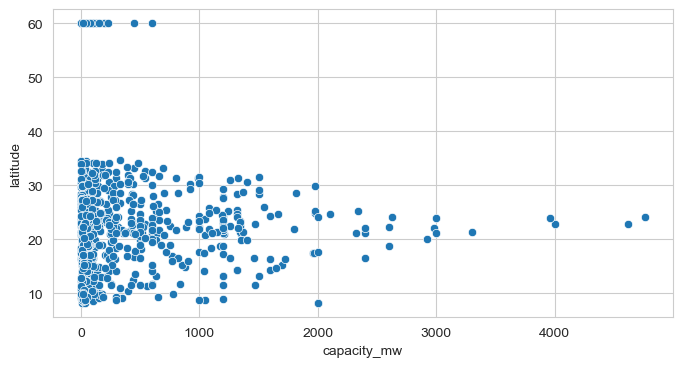

In [56]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='latitude',data=df)

<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2013'>

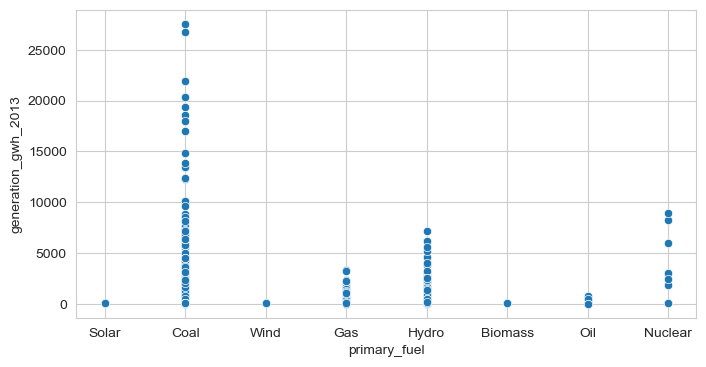

In [57]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2013',data=df)

we can here the coal is most used fuel in 2013 and Nuclear,Gas and hydro on average use and Solar,Wind Bomass nad oil was very less used

<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2014'>

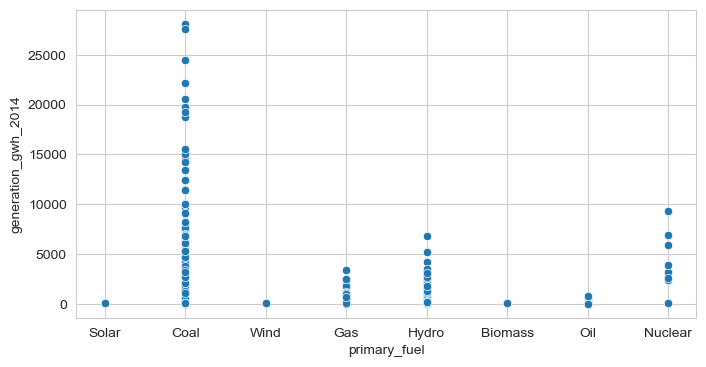

In [58]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2014',data=df)

<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2015'>

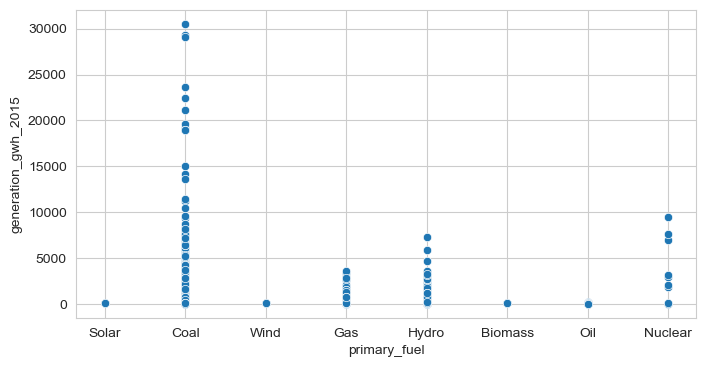

In [59]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2015',data=df)

<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2016'>

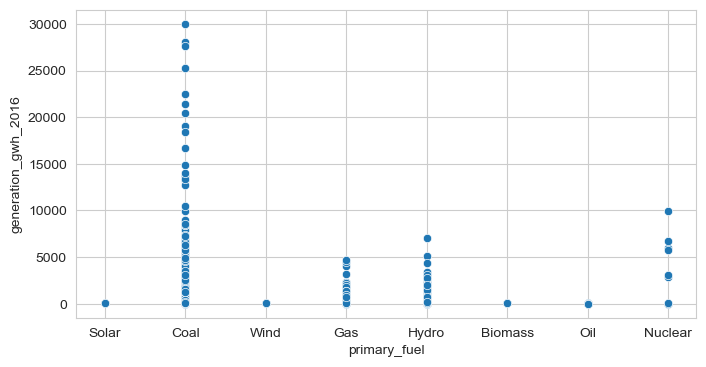

In [60]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2016',data=df)

<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2017'>

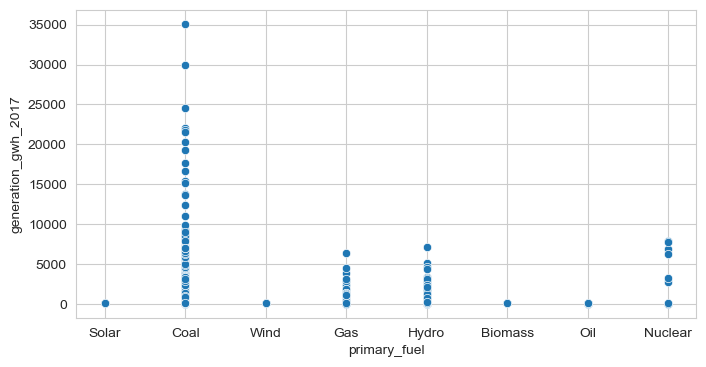

In [61]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2017',data=df)

# In all of the year 2013 to 2017 the coal is most used fuel in 2013 and Nuclear,Gas and hydro on average use and Solar,Wind Bomass nad oil was very less used

<Axes: xlabel='primary_fuel', ylabel='latitude'>

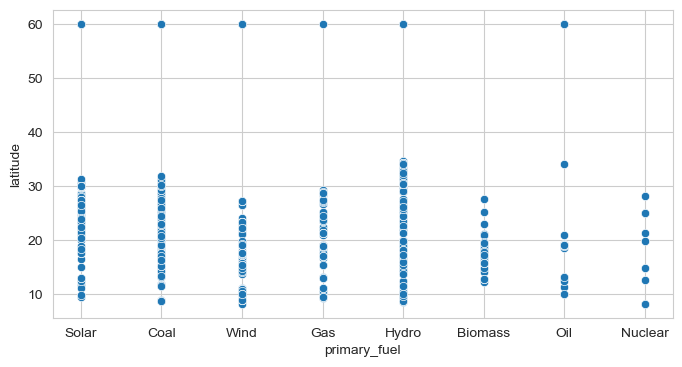

In [62]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='latitude',data=df)

<Axes: xlabel='capacity_mw', ylabel='primary_fuel'>

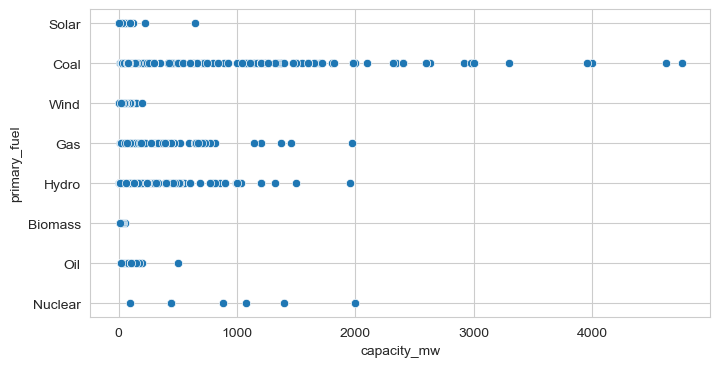

In [63]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='primary_fuel',data=df)

Coal is on max electrical generating capacity in megawatts

# LabelEncoder for converting categorical to numerical

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   capacity_mw            908 non-null    float64
 1   latitude               908 non-null    float64
 2   longitude              908 non-null    float64
 3   primary_fuel           908 non-null    object 
 4   commissioning_year     908 non-null    float64
 5   source                 908 non-null    object 
 6   geolocation_source     908 non-null    object 
 7   year_of_capacity_data  908 non-null    float64
 8   generation_gwh_2013    908 non-null    float64
 9   generation_gwh_2014    908 non-null    float64
 10  generation_gwh_2015    908 non-null    float64
 11  generation_gwh_2016    908 non-null    float64
 12  generation_gwh_2017    908 non-null    float64
dtypes: float64(10), object(3)
memory usage: 92.3+ KB


In [65]:
df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [66]:
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', 'Industry About'],
      dtype=object)

In [68]:
from sklearn.preprocessing import LabelEncoder

In [69]:
encoder = LabelEncoder()
df['primary_fuel'] = encoder.fit_transform(df['primary_fuel'])
df['geolocation_source'] = encoder.fit_transform(df['geolocation_source'])
df['source'] = encoder.fit_transform(df['source'])

In [70]:
df['geolocation_source'].unique()

array([1, 2, 0])

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   capacity_mw            908 non-null    float64
 1   latitude               908 non-null    float64
 2   longitude              908 non-null    float64
 3   primary_fuel           908 non-null    int32  
 4   commissioning_year     908 non-null    float64
 5   source                 908 non-null    int32  
 6   geolocation_source     908 non-null    int32  
 7   year_of_capacity_data  908 non-null    float64
 8   generation_gwh_2013    908 non-null    float64
 9   generation_gwh_2014    908 non-null    float64
 10  generation_gwh_2015    908 non-null    float64
 11  generation_gwh_2016    908 non-null    float64
 12  generation_gwh_2017    908 non-null    float64
dtypes: float64(10), int32(3)
memory usage: 81.7 KB


All columns are converted into numerical now

# Removing Outliers Using Zscore

In [72]:
from scipy.stats import zscore

z=np.abs(zscore(df[['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','capacity_mw']]))
print(np.where(z>3))

(array([ 15,  15,  15,  15, 144, 144, 144, 144, 144, 144, 159, 159, 210,
       210, 210, 210, 210, 210, 309, 309, 309, 309, 309, 309, 364, 365,
       365, 365, 365, 365, 365, 376, 483, 494, 494, 494, 494, 494, 494,
       495, 495, 495, 495, 495, 495, 533, 533, 624, 649, 649, 649, 649,
       649, 649, 658, 658, 658, 658, 658, 658, 696, 696, 696, 696, 696,
       722, 722, 722, 722, 722, 725, 725, 725, 725, 725, 727, 727, 727,
       727, 727, 727, 787, 787, 787, 787, 787, 787, 789, 809, 809, 809,
       809, 809, 809, 881, 881, 881, 881, 881, 881], dtype=int64), array([2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3,
       4, 5, 5, 0, 1, 2, 3, 4, 5, 5, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4,
       5, 0, 1, 1, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 0,
       1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 5,
       0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5], dtype=int64))


In [73]:
z = np.abs(zscore(df[['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','capacity_mw']]))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (908, 13)
Shape of the dataframe after removing outliers:  (885, 13)
Percentage of data loss post outlier removal:  2.5330396475770924


In [74]:
df.shape

(885, 13)

# Skewness handling

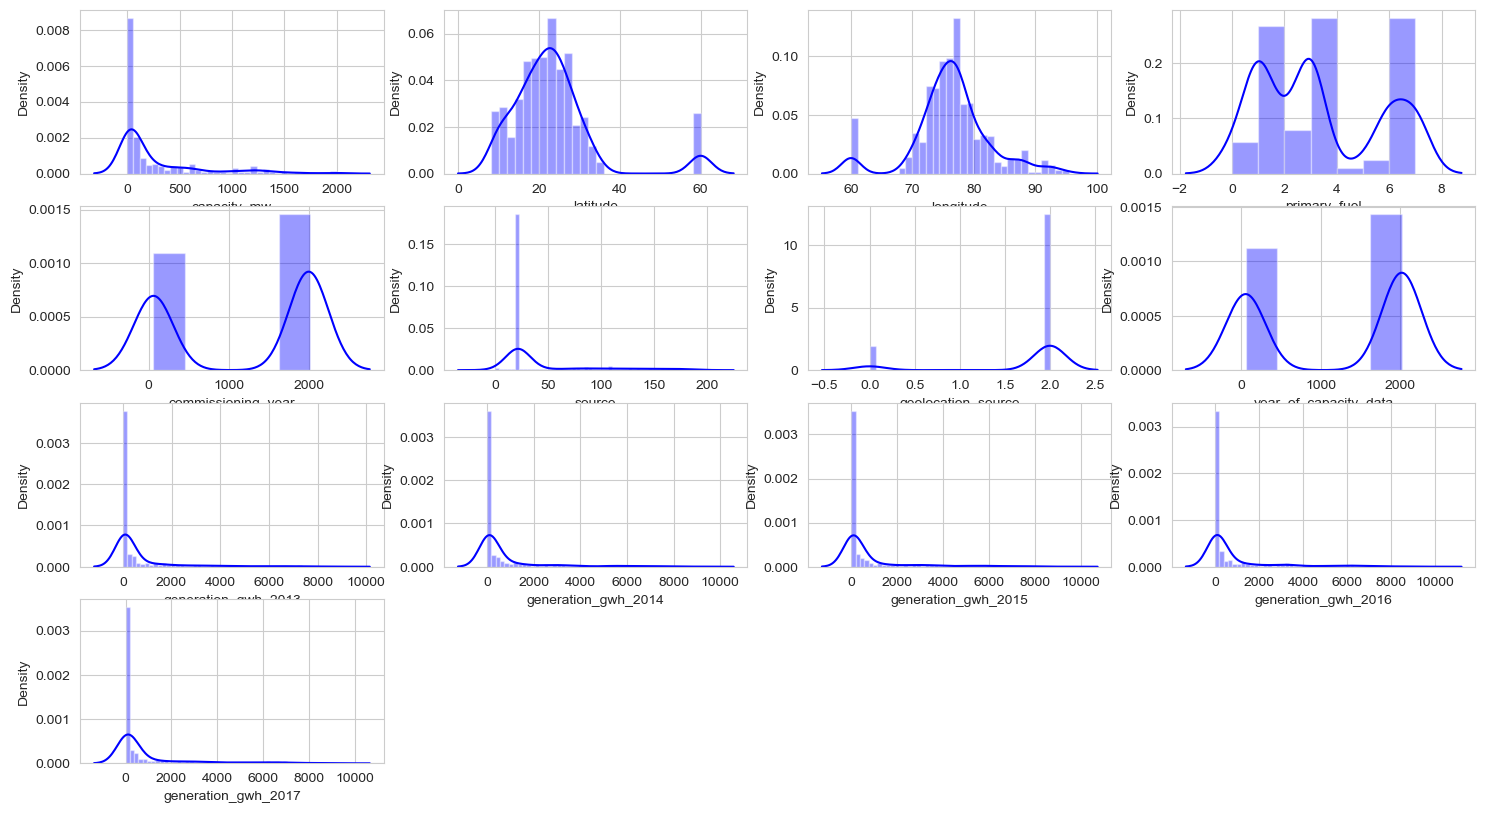

In [75]:
plt.figure(figsize=(18,20))
for i in enumerate(df):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='b')

In [76]:
df.skew()

capacity_mw              2.052718
latitude                 1.965094
longitude               -0.179399
primary_fuel             0.430662
commissioning_year      -0.285274
source                   1.788010
geolocation_source      -2.118329
year_of_capacity_data   -0.248639
generation_gwh_2013      2.994575
generation_gwh_2014      2.867788
generation_gwh_2015      2.684811
generation_gwh_2016      2.630710
generation_gwh_2017      2.540274
dtype: float64

skewness more than+/- 0.5 will we treated

In [77]:
from sklearn.preprocessing import power_transform

df[['capacity_mw',"generation_gwh_2013",'generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']]=power_transform(df[['capacity_mw',"generation_gwh_2013",'generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']])

In [78]:
df.skew()

capacity_mw              0.014952
latitude                 1.965094
longitude               -0.179399
primary_fuel             0.430662
commissioning_year      -0.285274
source                   1.788010
geolocation_source      -2.118329
year_of_capacity_data   -0.248639
generation_gwh_2013     -0.034887
generation_gwh_2014     -0.014669
generation_gwh_2015     -0.012333
generation_gwh_2016     -0.009262
generation_gwh_2017     -0.005003
dtype: float64

In [79]:
pd.DataFrame(df).isnull().sum()

capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year       0
source                   0
geolocation_source       0
year_of_capacity_data    0
generation_gwh_2013      0
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
dtype: int64

# First taking 'capacity_mw' as target creating Regression model

# Dividing data into X and Y

In [80]:
x=df.drop(['capacity_mw'],axis=1)
y=df['capacity_mw']

In [81]:
x.shape

(885, 12)

In [82]:
y.shape

(885,)

# Scaling X values

In [83]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)

In [84]:
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
dtype: int64

In [85]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000
mean,0.290048,0.464901,0.466182,0.564383,0.233637,0.863277,0.561582,0.591291,0.568494,0.568932,0.566561,0.565028
std,0.204202,0.173085,0.326078,0.489898,0.237158,0.342100,0.496474,0.183883,0.196731,0.200379,0.202994,0.210328
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.169119,0.388333,0.142857,0.000000,0.115789,1.000000,0.000000,0.504674,0.478042,0.477061,0.470282,0.465067
50%,0.269591,0.463212,0.428571,0.978039,0.115789,1.000000,1.000000,0.504674,0.478042,0.477061,0.470282,0.465067
75%,0.359508,0.539802,0.857143,0.991828,0.184211,1.000000,1.000000,0.710270,0.700391,0.703337,0.699987,0.703190
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Data has been scalled

# MODEL BUILDING

# Linear Regression

In [86]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# CHECKING THE BEST RANDOM STATE FOR DATA SPLIT

In [87]:
from sklearn.linear_model import LinearRegression


LR=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state {i}, The training accuracy is: {r2_score(y_train,LR_predict_train)}')
    print(f'At random state {i}, The test accuracy is: {r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state 0, The training accuracy is: 0.6039239136680166
At random state 0, The test accuracy is: 0.626413194411559


At random state 1, The training accuracy is: 0.6093039093882431
At random state 1, The test accuracy is: 0.6055640739937355


At random state 2, The training accuracy is: 0.635791813332595
At random state 2, The test accuracy is: 0.47395374920734523


At random state 3, The training accuracy is: 0.6110618717573684
At random state 3, The test accuracy is: 0.5953279208350932


At random state 4, The training accuracy is: 0.6099604916732903
At random state 4, The test accuracy is: 0.5991018320140159


At random state 5, The training accuracy is: 0.620509561479915
At random state 5, The test accuracy is: 0.5455946392635427


At random state 6, The training accuracy is: 0.6202971568211109
At random state 6, The test accuracy is: 0.5415596708413895


At random state 7, The training accuracy is: 0.6173917826772107
At random state 7, The test accuracy is: 0.5597089627843

random state is giving highest accuracy that is 95, choosing that as random state

SPLITTING THE DATA WITH RANDOM STATE =95

In [88]:
#splitting the data into 73% training and 27% testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.27,random_state=95)

In [89]:
x_train.shape

(646, 12)

In [90]:
x_test.shape

(239, 12)

In [91]:
y_train.shape

(646,)

In [92]:
y_test.shape

(239,)

In [93]:
from sklearn.linear_model import LinearRegression


LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.5892794328746518


In [94]:
print('MSE:',mean_squared_error(LR_predict,y_test))
print('MAE:',mean_absolute_error(LR_predict,y_test))
print('r2_score:',r2_score(LR_predict,y_test))

MSE: 0.37094655040465835
MAE: 0.48227993554468696
r2_score: 0.361770112576303


# Ridge

In [95]:
from sklearn.linear_model import Ridge

R=Ridge()
R.fit(x_train,y_train)
print(R.score(x_train,y_train))
R_predict=R.predict(x_test)

0.588614173898391


In [96]:
print('MSE:',mean_squared_error(R_predict,y_test))
print('MAE:',mean_absolute_error(R_predict,y_test))
print('r2_score:',r2_score(R_predict,y_test))

MSE: 0.3683714107332635
MAE: 0.48271051596844333
r2_score: 0.3558843633531201


# SVR
SVR(kernel='linear')

In [97]:
from sklearn.svm import SVR

svr=SVR(kernel='linear')
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
svr_predict=svr.predict(x_test)

0.5464254296847437


In [98]:
print('MSE:',mean_squared_error(svr_predict,y_test))
print('MAE:',mean_absolute_error(svr_predict,y_test))
print('r2_score:',r2_score(svr_predict,y_test))

MSE: 0.3899342155733507
MAE: 0.44150208259974993
r2_score: 0.468570616062713


# SVR(kernel='poly')

In [99]:
svr_p=SVR(kernel='poly')
svr_p.fit(x_train,y_train)
print(svr_p.score(x_train,y_train))
svrpred_p=svr_p.predict(x_test)

0.7786447168762113


In [100]:
print('MSE:',mean_squared_error(svrpred_p,y_test))
print('MAE:',mean_absolute_error(svrpred_p,y_test))
print('r2_score:',r2_score(svrpred_p,y_test))

MSE: 0.21265227431509895
MAE: 0.3361438263269886
r2_score: 0.7438261548958853


# (kernel='rbf')

In [101]:
svr_r=SVR(kernel='rbf')
svr_r.fit(x_train,y_train)
print(svr_r.score(x_train,y_train))
svrpred_r=svr_r.predict(x_test)

0.7743651104622278


In [102]:
print('MSE:',mean_squared_error(svrpred_r,y_test))
print('MAE:',mean_absolute_error(svrpred_r,y_test))
print('r2_score:',r2_score(svrpred_r,y_test))

MSE: 0.1907293219517003
MAE: 0.3258471034791402
r2_score: 0.7444957353365191


# Random Forest Regressor

In [103]:
from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor()
RF.fit(x_train,y_train)
print(RF.score(x_train,y_train))
RF_PRED=RF.predict(x_test)

print('MSE:',mean_squared_error(RF_PRED,y_test))
print('MAE:',mean_absolute_error(RF_PRED,y_test))
print('r2_score:',r2_score(RF_PRED,y_test))

0.9601422525982799
MSE: 0.14802097046278595
MAE: 0.2805145276582379
r2_score: 0.8190422177627261


# DecisionTreeRegressor

In [104]:
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
print(DTR.score(x_train,y_train))
DTR_PRED=DTR.predict(x_test)

print('MSE:',mean_squared_error(DTR_PRED,y_test))
print('MAE:',mean_absolute_error(DTR_PRED,y_test))
print('r2_score:',r2_score(DTR_PRED,y_test))

0.9906753612727366
MSE: 0.3111924439319779
MAE: 0.4059607188691395
r2_score: 0.6769158983905956


# GradientBoostingRegressor

In [105]:
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
print(GBR.score(x_train,y_train))
GBR_PRED=GBR.predict(x_test)

print('MSE:',mean_squared_error(GBR_PRED,y_test))
print('MAE:',mean_absolute_error(GBR_PRED,y_test))
print('r2_score:',r2_score(GBR_PRED,y_test))

0.880693292724412
MSE: 0.14985985612033037
MAE: 0.29581240933124736
r2_score: 0.810417111654443


# Cross Validation

In [106]:
from sklearn.model_selection import cross_val_score

np.random.seed(10)
def rmse_cv(model, x,y):
    rmse =- (cross_val_score(model, x,y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)


models = [LinearRegression(),
             Ridge(),
             SVR(kernel='linear'),
             SVR(kernel='poly'),
             SVR(kernel='rbf'),
             RandomForestRegressor(),
             DecisionTreeRegressor(),  
             GradientBoostingRegressor(),]
            


names = ['LR','R','svr','svr_p','svr_r','RF','DTR','GBR']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}    : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR    : 0.405524, 0.058934
R    : 0.404006, 0.059750
svr    : 0.448060, 0.072752
svr_p    : 0.252783, 0.053900
svr_r    : 0.235182, 0.064253
RF    : 0.209919, 0.059237
DTR    : 0.332870, 0.102150
GBR    : 0.202446, 0.062549


# TAKING 'primary_fuel' AS TARGET , CREATING CLASSIFICATION MODEL
Dividing data into X and Y

In [120]:
x=df.drop(['primary_fuel'],axis=1)
y=df['primary_fuel']

In [121]:
x.shape

(885, 12)

In [122]:
y.shape

(885,)

# Spliting Train and Test data

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.27,random_state=42)

In [125]:
x_train.shape

(646, 12)

In [126]:
x_test.shape

(239, 12)

In [127]:
y_train.shape

(646,)

In [128]:
y_test.shape

(239,)

# MODEL BUILDING

In [129]:
#Importing necessary libraries

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

# LogisticRegression

In [130]:
logreg=LogisticRegression()
logreg_score=cross_val_score(logreg,x,y,cv=5,scoring='accuracy')
print("cross validation score:",np.mean(logreg_score))

cross validation score: 0.6203389830508474


In [131]:
logreg.fit(x_train,y_train)
LR_predicted=logreg.predict(x_test)

print(accuracy_score(y_test,LR_predicted))
print(confusion_matrix(y_test,LR_predicted))
print(classification_report(y_test,LR_predicted))
print("Training accuracy::",logreg.score(x_train,y_train))
print("Test accuracy::",logreg.score(x_test,y_test))

0.6317991631799164
[[ 0  0  0  0  0  0 11  1]
 [ 0 28  0 19  0  0 17  4]
 [ 0  8  0  8  0  0  2  1]
 [ 0  7  0 61  0  0  0  0]
 [ 0  0  0  2  0  0  0  0]
 [ 0  0  0  2  0  0  3  0]
 [ 0  0  0  0  0  0 27  3]
 [ 0  0  0  0  0  0  0 35]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.65      0.41      0.50        68
           2       0.00      0.00      0.00        19
           3       0.66      0.90      0.76        68
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         5
           6       0.45      0.90      0.60        30
           7       0.80      1.00      0.89        35

    accuracy                           0.63       239
   macro avg       0.32      0.40      0.34       239
weighted avg       0.55      0.63      0.57       239

Training accuracy:: 0.6145510835913313
Test accuracy:: 0.6317991631799164


# DECISION TREE CLASSIFIER

In [132]:
dtc=DecisionTreeClassifier()
dtc_score=cross_val_score(dtc,x,y,cv=5,scoring='accuracy')
print("cross validation score for svm:",np.mean(dtc_score))

cross validation score for svm: 0.7943502824858757


In [133]:
dtc.fit(x_train,y_train)
predicted_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,predicted_dtc))
print(confusion_matrix(y_test,predicted_dtc))
print(classification_report(y_test,predicted_dtc))
print("Training accuracy::",dtc.score(x_train,y_train))
print("Test accuracy::",dtc.score(x_test,y_test))

0.7907949790794979
[[11  1  0  0  0  0  0  0]
 [ 2 47  6  9  1  3  0  0]
 [ 0  3  9  6  0  1  0  0]
 [ 0  9  3 55  0  1  0  0]
 [ 0  1  0  0  0  1  0  0]
 [ 0  1  1  0  0  3  0  0]
 [ 1  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  0  0 35]]
              precision    recall  f1-score   support

           0       0.79      0.92      0.85        12
           1       0.76      0.69      0.72        68
           2       0.47      0.47      0.47        19
           3       0.79      0.81      0.80        68
           4       0.00      0.00      0.00         2
           5       0.33      0.60      0.43         5
           6       1.00      0.97      0.98        30
           7       1.00      1.00      1.00        35

    accuracy                           0.79       239
   macro avg       0.64      0.68      0.66       239
weighted avg       0.80      0.79      0.79       239

Training accuracy:: 1.0
Test accuracy:: 0.7907949790794979


# KNeighborsClassifier

In [134]:
knn=KNeighborsClassifier()
knn_score=cross_val_score(knn,x,y,cv=5,scoring='accuracy')
print("cross validation score for knn:",np.mean(knn_score))

cross validation score for knn: 0.7299435028248588


In [135]:
knn.fit(x_train,y_train)
predicted_knn=knn.predict(x_test)
print(accuracy_score(y_test,predicted_knn))
print(confusion_matrix(y_test,predicted_knn))
print(classification_report(y_test,predicted_knn))
print("Training accuracy::",knn.score(x_train,y_train))
print("Test accuracy::",knn.score(x_test,y_test))

0.7364016736401674
[[ 8  2  1  0  0  0  1  0]
 [ 2 43  5 12  0  0  5  1]
 [ 1  8  5  4  0  0  0  1]
 [ 0  1  1 64  0  2  0  0]
 [ 0  0  1  1  0  0  0  0]
 [ 1  1  0  2  0  0  1  0]
 [ 5  3  0  0  0  0 21  1]
 [ 0  0  0  0  0  0  0 35]]
              precision    recall  f1-score   support

           0       0.47      0.67      0.55        12
           1       0.74      0.63      0.68        68
           2       0.38      0.26      0.31        19
           3       0.77      0.94      0.85        68
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         5
           6       0.75      0.70      0.72        30
           7       0.92      1.00      0.96        35

    accuracy                           0.74       239
   macro avg       0.50      0.53      0.51       239
weighted avg       0.71      0.74      0.72       239

Training accuracy:: 0.8142414860681114
Test accuracy:: 0.7364016736401674


# RandomForestClassifier

In [136]:
rfc=RandomForestClassifier()
rfc_score=cross_val_score(rfc,x,y,cv=5,scoring='accuracy')
print("cross validation score for rfc:",np.mean(rfc_score))

cross validation score for rfc: 0.8508474576271187


In [137]:
rfc.fit(x_train,y_train)
predicted_rfc=rfc.predict(x_test)
print(accuracy_score(y_test,predicted_rfc))
print(confusion_matrix(y_test,predicted_rfc))
print(classification_report(y_test,predicted_rfc))
print("Training accuracy::",rfc.score(x_train,y_train))
print("Test accuracy::",rfc.score(x_test,y_test))

0.8451882845188284
[[11  1  0  0  0  0  0  0]
 [ 6 52  1  7  0  2  0  0]
 [ 0  4  5  8  0  2  0  0]
 [ 0  3  0 65  0  0  0  0]
 [ 0  1  0  0  0  1  0  0]
 [ 0  1  0  0  0  4  0  0]
 [ 0  0  0  0  0  0 30  0]
 [ 0  0  0  0  0  0  0 35]]
              precision    recall  f1-score   support

           0       0.65      0.92      0.76        12
           1       0.84      0.76      0.80        68
           2       0.83      0.26      0.40        19
           3       0.81      0.96      0.88        68
           4       0.00      0.00      0.00         2
           5       0.44      0.80      0.57         5
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        35

    accuracy                           0.85       239
   macro avg       0.70      0.71      0.68       239
weighted avg       0.85      0.85      0.83       239

Training accuracy:: 1.0
Test accuracy:: 0.8451882845188284


# ENSEMBLE TECHNIQUES

# ADA BOOST CLASSIFIER

In [138]:
adb=AdaBoostClassifier()
adb_score=cross_val_score(adb,x,y,cv=10,scoring='accuracy')
print("cross validation score for Ada boost:",np.mean(adb_score))

cross validation score for Ada boost: 0.46562819203268635


In [139]:
adb.fit(x_train,y_train)
predicted_adb=adb.predict(x_test)
print(accuracy_score(y_test,predicted_adb))
print(confusion_matrix(y_test,predicted_adb))
print(classification_report(y_test,predicted_adb))
print("Training accuracy::",adb.score(x_train,y_train))
print("Test accuracy::",adb.score(x_test,y_test))

0.41841004184100417
[[ 0  0  0 12  0  0  0  0]
 [ 0  3  0 65  0  0  0  0]
 [ 0  0  0 19  0  0  0  0]
 [ 0  0  0 68  0  0  0  0]
 [ 0  0  0  2  0  0  0  0]
 [ 0  0  0  5  0  0  0  0]
 [ 0  0  0  1  0  0 29  0]
 [ 0 35  0  0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.08      0.04      0.06        68
           2       0.00      0.00      0.00        19
           3       0.40      1.00      0.57        68
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         5
           6       1.00      0.97      0.98        30
           7       0.00      0.00      0.00        35

    accuracy                           0.42       239
   macro avg       0.18      0.25      0.20       239
weighted avg       0.26      0.42      0.30       239

Training accuracy:: 0.44272445820433437
Test accuracy:: 0.41841004184100417


# BAGGING CLASSIFIER

In [140]:
bgc=BaggingClassifier()
bgc_score=cross_val_score(bgc,x,y,cv=10,scoring='accuracy')
print("cross validation score for BAGGING Classifier:",np.mean(bgc_score))

cross validation score for BAGGING Classifier: 0.8315245148110316


In [141]:
bgc.fit(x_train,y_train)
predicted_bgc=bgc.predict(x_test)
print(accuracy_score(y_test,predicted_bgc))
print(confusion_matrix(y_test,predicted_bgc))
print(classification_report(y_test,predicted_bgc))
print("Training accuracy::",bgc.score(x_train,y_train))
print("Test accuracy::",bgc.score(x_test,y_test))


0.8368200836820083
[[12  0  0  0  0  0  0  0]
 [ 5 48  2  9  2  2  0  0]
 [ 0  4 10  4  0  1  0  0]
 [ 0  5  1 62  0  0  0  0]
 [ 0  1  0  0  0  1  0  0]
 [ 0  1  1  0  0  3  0  0]
 [ 0  0  0  0  0  0 30  0]
 [ 0  0  0  0  0  0  0 35]]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        12
           1       0.81      0.71      0.76        68
           2       0.71      0.53      0.61        19
           3       0.83      0.91      0.87        68
           4       0.00      0.00      0.00         2
           5       0.43      0.60      0.50         5
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        35

    accuracy                           0.84       239
   macro avg       0.69      0.72      0.69       239
weighted avg       0.84      0.84      0.83       239

Training accuracy:: 0.9953560371517027
Test accuracy:: 0.8368200836820083


# HYPER PARAMETER TUNING

In [145]:
rfc=RandomForestClassifier()
param_grid={
    'criterion' : ["gini", "entropy"],
    'n_estimators':[200,50],
    'min_samples_split':[2,3],
     'random_state':[10]              
}

In [146]:
rfc_grid=GridSearchCV(RandomForestClassifier(),param_grid,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [147]:
rfc_grid.fit(x_train,y_train)
rfc_pred=rfc_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,rfc_pred))

Fitting 4 folds for each of 8 candidates, totalling 32 fits
Accuracy after parameter tuning:: 0.8368200836820083


In [148]:
rfc_grid.best_params_

{'criterion': 'entropy',
 'min_samples_split': 3,
 'n_estimators': 200,
 'random_state': 10}

# Model training with best parameters

In [149]:
best_param={
    'criterion' : ['gini'],
    'n_estimators':[200],
    'min_samples_split':[2],
     'random_state':[10]    }

In [150]:
best_rfc_grid=GridSearchCV(RandomForestClassifier(),best_param,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [151]:
best_rfc_grid.fit(x_train,y_train)
best_rfc_pred=best_rfc_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,best_rfc_pred))

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Accuracy after parameter tuning:: 0.8326359832635983


# Report of RandomForestClassifier

In [152]:
print("CLASSIFICATION REPORT::\n",classification_report(y_test,best_rfc_pred))

CLASSIFICATION REPORT::
               precision    recall  f1-score   support

           0       0.61      0.92      0.73        12
           1       0.83      0.76      0.79        68
           2       0.80      0.21      0.33        19
           3       0.80      0.96      0.87        68
           4       0.00      0.00      0.00         2
           5       0.29      0.40      0.33         5
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        35

    accuracy                           0.83       239
   macro avg       0.67      0.66      0.63       239
weighted avg       0.84      0.83      0.82       239



<Axes: >

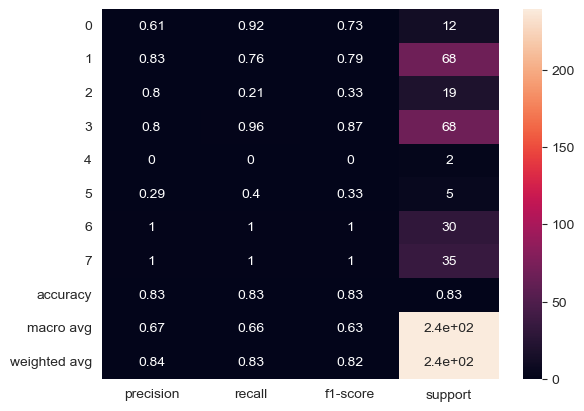

In [153]:
clsf_repo = classification_report(y_test,best_rfc_pred,output_dict=True)
sns.heatmap(pd.DataFrame(clsf_repo).T, annot=True)

In [154]:
from sklearn.metrics import roc_auc_score

In [155]:
y_prob = best_rfc_grid.fit(x_train,y_train).predict_proba(x_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("="*40)
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

Fitting 4 folds for each of 1 candidates, totalling 4 fits
One-vs-One ROC AUC scores:
0.945393 (macro),
0.953764 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.956179 (macro),
0.970144 (weighted by prevalence)


# Saving Model

In [156]:
import joblib

In [157]:
joblib.dump(best_rfc_grid.best_estimator_,'Global Power Plant Classification.obj')

['Global Power Plant Classification.obj']